<a href="https://colab.research.google.com/github/brisabn/Tarefa2-MCF/blob/main/Tarefa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ‚âΩ^‚Ä¢‡ºö‚Ä¢ ‡æÄ‡Ω≤‚âº Tarefa 2: An√°lise Espectral

Brisa do Nascimento Barbosa ‚Äî Universidade Federal de Minas Gerais, 2024.

Jupyter Notebook criado pelo Google Colab.

## Upload dos arquivos de entrada

In [112]:
!git clone https://github.com/brisabn/Tarefa2-MCF.git
%cd Tarefa2-MCF
!ls

Cloning into 'Tarefa2-MCF'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 3.95 MiB | 9.27 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Tarefa2-MCF/Tarefa2-MCF
dow2.txt  dow.txt  house.txt  piano.txt  README.md  Tarefa2.ipynb  trumpet.txt


# *¬∞:‚ãÜ‚Çì‚Çí Transformadas de Fourier de formas de onda

Nesta se√ß√£o, utilizamos a Transformada R√°pida de Fourier (FFT) para recuperar o som de uma nota de piano e de trompete a partir de um arquivo que representa a forma de onda.



## Utilit√°rios

### Extra√ß√£o de dados

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from IPython.display import Audio, display

sample_rate=44100 # taxa padr√£o da ind√∫stria

def load_data(filename):
    return np.loadtxt(filename, dtype=int)

### FFT para c√°lculo de magnitudes

**Transformada de Fourier:**
Dada uma fun√ß√£o peri√≥dica $f(x)$ definida no intervalo $0 \leq x < L$, podemos escrev√™-la como uma s√©rie de Fourier, na forma geral

$$f(x) = \sum_{k=0}^{\infty} \alpha_k \cos\left(\frac{2\pi kx}{L}\right) + \sum_{k=1}^{\infty} \beta_k \sin\left(\frac{2\pi kx}{L}\right)$$

Alternativamente, podemos usar $\cos(\theta) = \frac{1}{2}\left(e^{i\theta} + e^{-i\theta}\right)$ e $\sin(\theta) = \frac{1}{2}i\left(e^{i\theta} - e^{-i\theta}\right)$, de forma a obter

$$f(x) = \sum_{k=-\infty}^{\infty} \gamma_k e^{\frac{i 2\pi kx}{L}}$$, onde

$$\gamma_k =
\begin{cases}
\frac{1}{2}(a_k - i\beta_k) & \text{se } k < 0,\\
a_0 & \text{se } k = 0,\\
\frac{1}{2}(a_k + i\beta_k) & \text{se } k > 0.
\end{cases}$$

Fazendo as devidas manipula√ß√µes matem√°tica, os coeficientes de Fourier $\gamma_k$ podem ser expressos como

$$\gamma_k = \frac{1}{L} \int_{0}^{L} f(x) e^{-i \frac{2\pi kx}{L}} \, dx$$

**Transformada de Fourier Discreta (DFT)** √© equivalente √† Transformada de Fourier cont√≠nua para sinais conhecidos, mas √© definida apenas em instantes separados por intervalos discretos de amostragem.

$$\gamma_k = \frac{1}{N} \sum_{n=0}^{N-1} y_n \exp\left(- i\frac{2\pi kn}{N}\right) .$$

Por conven√ß√£o, ignoramos o fatos $\frac{1}{N}$ e representaremos os coeficientes de Fourier como $C_k$.

$$C_k = \sum_{n=0}^{N-1} y_n \exp\left(- i\frac{2\pi kn}{N}\right) .$$

$C_k$ define, na pr√°tica, os coeficientes de Fourier.

**Transformada Inversa de Fourier Discreta (IDFT)** √© o complemento da DFT, assim, dados os coeficientes $C_k$, podemos recuperar exatamente os valores das amostras $y_n$ de onde vieram (exceto por erro de arredondamento).

$$ y_n = \frac{1}{N} \sum_{k=0}^{N-1} c_k \exp\left(i \frac{2\pi kn}{N}\right)$$

Uma observa√ß√£o √© que se duas fun√ß√µes t√™m os mesmos valores nos pontos de amostragem, suas Transformadas Discretas de Fourier (DFTs) ser√£o id√™nticas. Para fun√ß√µes suavemente vari√°veis, sem mudan√ßas abruptas entre amostras, conhecer apenas os valores nos pontos de amostra √© suficiente para obter uma ideia geral da forma da fun√ß√£o. Frequentemente, estamos interessados em fun√ß√µes representadas por conjuntos de amostras, n√£o por fun√ß√µes cont√≠nuas, e a DFT √© uma ferramenta excelente para esse tipo de dados.


**Transformada R√°pida de Fourier (FFT)** A FFT √© um algoritmo eficiente para calcular a DFT. Enquanto a DFT direta tem complexidade $ O(N^2) $, a FFT reduz essa complexidade para $ O(N \log N) $, tornando o c√°lculo muito mais r√°pido e vi√°vel para grandes conjuntos de dados. O algoritmo FFT utilizado pela biblioteca numpy √© o Cooley-Tukey, o qual aplica divis√£o e conquista para resolver recursivamente. Dessa forma, aFFT combina esses resultados de maneira eficiente usando a simetria e periodicidade dos expoentes complexos.

O procedimento funciona da seguinte maneira:

O algoritmo divide a DFT de um sinal de comprimento $N$ em duas DFTs de comprimento $\frac{N}{2}$. Esta decomposi√ß√£o √© feita repetidamente at√© que o comprimento do sinal seja reduzido a 1, onde a DFT pode ser calculada diretamente. Em seguida, o sinal original √© dividido em duas subsequ√™ncias, uma contendo os termos de √≠ndice par e a outra contendo os termos de √≠ndice √≠mpar. Isso √© repetido recursivamente. Por fim, as DFTs das subsequ√™ncias s√£o ent√£o combinadas para obter a DFT do sinal original. Este passo envolve multiplica√ß√µes complexas por expoentes do tipo $e^{-i \frac{2\pi kn}{N}}$, conhecidos como *twiddle factors*.

Matematicamente, a DFT de um sinal $x_n$ pode ser escrita como:

$$
X_k = \sum_{n=0}^{N-1} x_n e^{-i \frac{2\pi kn}{N}}
$$

Para aplicar o Algoritmo de Cooley-Tukey, o sinal √© dividido em subsequ√™ncias de √≠ndices pares e √≠mpares:

$$
X_k = \sum_{m=0}^{N/2-1} x_{2m} e^{-i \frac{2\pi k (2m)}{N}} + \sum_{m=0}^{N/2-1} x[2m+1] e^{-i \frac{2\pi k (2m+1)}{N}}
$$

Isso pode ser reescrito como:

$$
X_k = X_{k_{\text{par}}} + e^{-i \frac{2\pi k}{N}} X_{{\text{√≠mpar}}[k]}
$$

onde $X_{\text{par}}[k]$ e $X_{\text{√≠mpar}}[k]$s√£o as DFTs das subsequ√™ncias dos √≠ndices pares e √≠mpares, respectivamente.


In [114]:
def compute_fft(data):
    fft_data = np.fft.fft(data)
    magnitudes = np.abs(fft_data)
    return magnitudes

### Frequ√™ncia da nota

Ap√≥s calcular a FFT, obtemos as magnitudes das componentes de frequ√™ncia do sinal. A frequ√™ncia dominante em um sinal √© identificada pelo √≠ndice do coeficiente de Fourier com a maior magnitude.
Assim, a frequ√™ncia de pico √© calculada utilizando a f√≥rmula:
   $$ \text{peak_freq} = \frac{\text{peak_idx} \times \text{sample_rate}}{\text{data_tam}} $$
   onde:
   - `peak_idx`: √çndice da maior magnitude em `magnitudes`.
   - `sample_rate`: Taxa de amostragem do sinal original.
   - `data_tam`: N√∫mero total de pontos de dados do sinal original.

A nota musical √© determinada calculando a posi√ß√£o da frequ√™ncia dominante na escala musical
padr√£o (onde a nota A4 tem frequ√™ncia de 440 Hz) e calculamos a dist√¢ncia em semitons dessa nota para a nota cuja frequ√™ncia foi identificada.

$$
\text{note_number} = 12 \times \log_2 \left( \frac{\text{freq}}{440} \right) + 49
$$



In [115]:
def find_peak_frequency(magnitudes, sample_rate, data_length):
    peak_index = np.argmax(magnitudes)
    peak_frequency = (peak_index * sample_rate) / data_length
    return peak_frequency

def frequency_to_note(freq):
    notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
    note_num = round(12 * np.log2(freq / 440) + 49)
    n = (note_num - 1 ) % len(notes)
    octave = int((note_num + 8) / len(notes))
    return notes[n] + str(octave)

### Plotagem e √°udio

In [116]:
def plot_waveform(data):
    plt.figure(figsize=(6, 4))
    plt.plot(data, color='rebeccapurple')
    plt.title('Forma de onda')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

def plot_magnitudes(magnitudes, num_coefficients=10000):
    plt.figure(figsize=(6, 4))
    plt.plot(magnitudes[:num_coefficients], color='slateblue')
    plt.title('Magnitudes dos primeiros 10.000 coeficientes da FFT')
    plt.xlabel('Coeficiente')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

In [117]:
def save_wav_and_display(data, sample_rate, wav_filename='output.wav'):
    normalized_data = data / np.max(np.abs(data))
    wav_data = np.int16(normalized_data * 32767)
    write(wav_filename, sample_rate, wav_data)
    display(Audio(wav_filename))

## Aplica√ß√£o

### ‚ô´ Piano

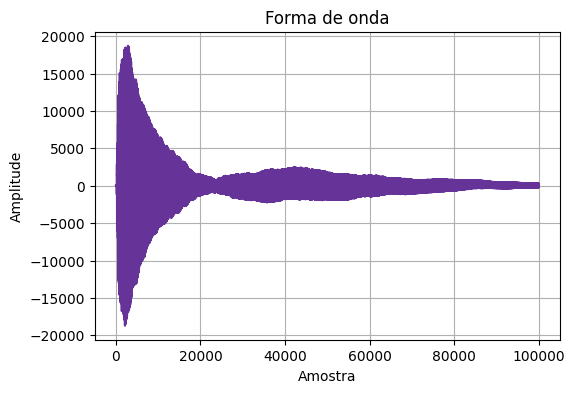

In [118]:
    data = load_data('/content/Tarefa2-MCF/piano.txt')
    plot_waveform(data)
    save_wav_and_display(data, sample_rate)

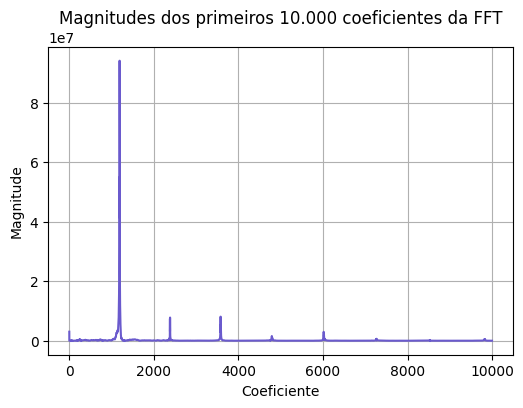

In [119]:
    magnitudes_piano = compute_fft(data)
    plot_magnitudes(magnitudes_piano)

In [120]:
    peak_freq_piano = find_peak_frequency(magnitudes_piano, sample_rate, len(data))
    note = frequency_to_note(peak_freq_piano)

    print(f"A frequ√™ncia fundamental √© {peak_freq_piano:.2f} Hz")
    print(f"A nota musical √© {note}")

A frequ√™ncia fundamental √© 524.79 Hz
A nota musical √© C5


### ‚ô´ Trumpet

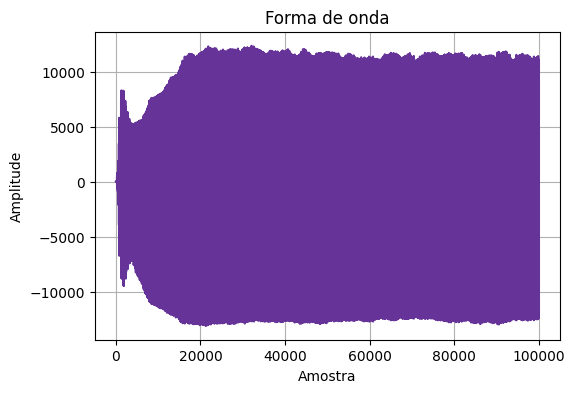

In [121]:
    data = load_data('/content/Tarefa2-MCF/trumpet.txt')
    plot_waveform(data)
    save_wav_and_display(data, sample_rate)

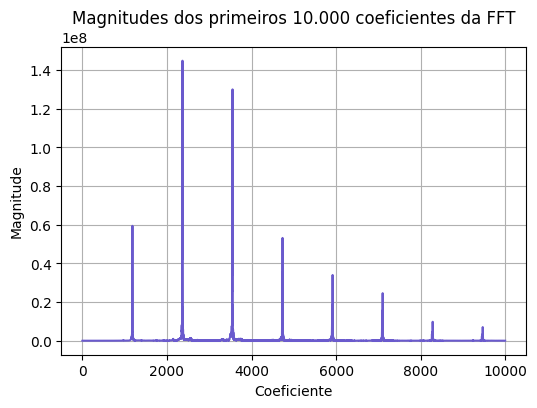

In [122]:
    magnitudes_trumpet = compute_fft(data)
    plot_magnitudes(magnitudes_trumpet)

In [123]:
    peak_freq_trumpet = find_peak_frequency(magnitudes_trumpet, sample_rate, len(data))
    note = frequency_to_note(peak_freq_trumpet)

    print(f"A frequ√™ncia fundamental √© {peak_freq_trumpet:.2f} Hz")
    print(f"A nota musical √© {note}")

A frequ√™ncia fundamental √© 1043.85 Hz
A nota musical √© C6


## Discuss√£o de resultados

A forma da onda dos dois intrumentos apresenta um formato bem diferente, isso se d√° pela diferen√ßa de timbre.

O gr√°fico do piano mostra um pico dominante na frequ√™ncia fundamental, seguido por v√°rios picos bem menoresque correspondem aos harm√¥nicos. A presen√ßa de harm√¥nicos, mas com menores intensidades, confere ao piano um som mais suave. Ou seja, ap√≥s o "ataque" inicial, h√° um decaimento significativo.

J√° o gr√°fico do trompete indica que seu timbre incisivo e sustenta√ß√£o mais longa. Ainda, al√©m do pico na frequ√™ncia fundamental, h√° v√°rios outros picos significativos, de forma que o som aparenta mais potente.

# *¬∞:‚ãÜ‚Çì‚Çí Filtragem e suaviza√ß√£o de Fourier

Nesta se√ß√£o, realizamos o carregamento de dados do √≠ndice Dow Jones, em seguida, aplicamos a Transformada R√°pida de Fourier (FFT) e a Transformada do Cosseno Discreta (DCT) para filtrar e reconstruir os dados originais.

## Utilit√°rios

### Extra√ß√£o de dados

In [124]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    return np.loadtxt(filename, dtype=float)

def plot_data(data, period):
  plt.figure(figsize=(8, 4))
  plt.plot(data, label='Original', color='royalblue')
  title = 'Dow Jones Industrial Average'
  full_title = f'{title} ({period})'
  plt.title(full_title)
  plt.xlabel('Dia √∫til')
  plt.ylabel('Valor de fechamento')
  plt.grid(True)

## Filtragem de dados com FFT
Aqui, √© feita a filtragem dos coeficientes da FFT realizada nos dados fornecidos, mantendo apenas uma porcentagem especificada dos coeficientes originais. Em seguida, ela reconstr√≥i os dados filtrados de volta para o dom√≠nio temporal utilizando a Transformada Inversa de Fourier (IFFT) e retorna essa vers√£o reconstru√≠da dos dados.

In [125]:
def filter_fft_and_reconstruct(data, keep_percent):
    # Transformada Discreta de Fourier - DFT (b)
    fft_coefficients = np.fft.rfft(data)

    # Zerando elementos (c)
    num_coef = len(fft_coefficients)
    num_to_keep = int(num_coef * (keep_percent / 100)) # coeficientes a serem mantidos
    filtered_fft_coefficients = np.zeros_like(fft_coefficients) # array zerado
    filtered_fft_coefficients[:num_to_keep] = fft_coefficients[:num_to_keep] # adicionado os mantidos

    # Calcula Transformada Inversa de Fourier (d)
    reconstructed_data = np.fft.irfft(filtered_fft_coefficients, n=len(data))

    return reconstructed_data

### Aplica√ß√£o com FFT

Aplicamos o c√≥digo desenvolvido ao conjunto de dados "Dow Jones Industrial Average (2006 a 2010)", mantendo 10% e 2% da informa√ß√£o original.

Os gr√°ficos gerados mostram que a curva reconstru√≠da com 10% dos dados suavizou muito bem a curva original, preservando significativamente seu formato geral. Embora a reconstru√ß√£o com apenas 2% dos dados tenha sido menos precisa, nota-se que mesmo com 98% dos dados descartados, ainda assim a curva resultante manteve uma suaviza√ß√£o aceit√°vel.







**Mantendo os primeiros 10%**

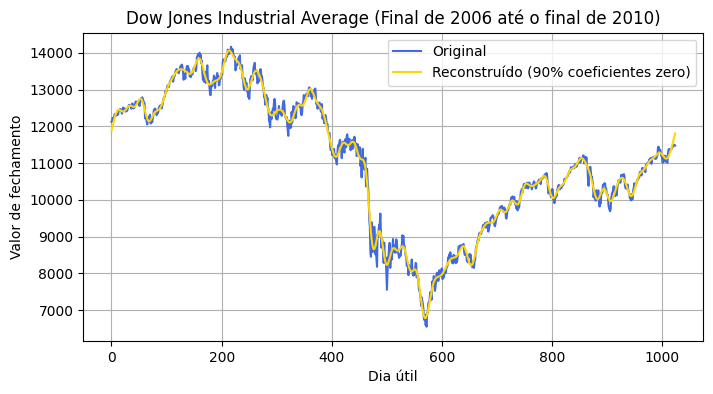

In [126]:
data = load_data('/content/Tarefa2-MCF/dow.txt')
plot_data(data, 'Final de 2006 at√© o final de 2010')

# Plotar os dados reconstru√≠dos com 10% dos coeficientes
reconstructed_data = filter_fft_and_reconstruct(data, 10)
plt.plot(reconstructed_data, label='Reconstru√≠do (90% coeficientes zero)', color='gold')
plt.legend()
plt.show()

**Compara√ß√£o mantendo 2% e os 10% primeiros na filtragem**

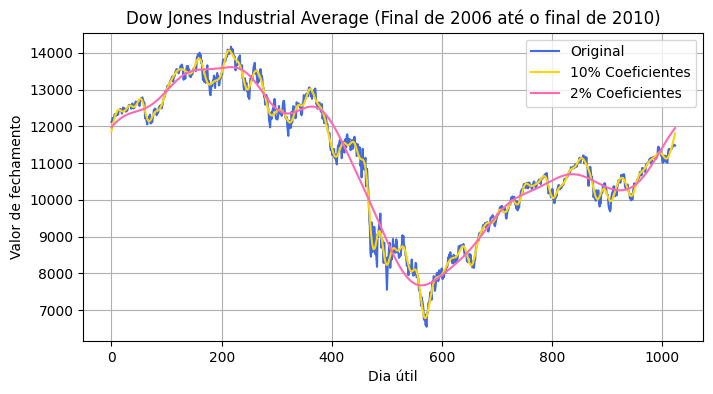

In [127]:
data = load_data('/content/Tarefa2-MCF/dow.txt')
plot_data(data, 'Final de 2006 at√© o final de 2010')

# Plotar os dados reconstru√≠dos com 10% dos coeficientes
reconstructed_data = filter_fft_and_reconstruct(data, 10)
plt.plot(reconstructed_data, label='10% Coeficientes', color='gold')

# Plotar os dados reconstru√≠dos com 2% dos coeficientes
reconstructed_data = filter_fft_and_reconstruct(data, 2)
plt.plot(reconstructed_data, label='2% Coeficientes', color='hotpink')

plt.legend()
plt.show()

## Filtragem de dados usando DCT
A FFT √© um algoritmo amplamente usado que calcula a Transformada de Fourier Discreta (DFT) de maneira eficiente. Ela captura tanto a amplitude quanto a informa√ß√£o de fase, Por outro lado, a DCT foca em representar sinais de valor real usando apenas fun√ß√µes cosseno, resultando em uma sa√≠da de valor real. Isso torna a DCT particularmente vantajosa para aplica√ß√µes como compress√£o de imagens, onde captura eficientemente o sinal com menos coeficientes. No entanto, ela √© menos flex√≠vel que a FFT, visto que  projetada especificamente para dados de valores reais. Ainda, ela pode n√£o ser t√£o eficaz onde a informa√ß√£o de fase √© crucial, j√° que n√£o preserva detalhes de fase como a FFT.

Em especial, o uso da DCT em vez da FFT apresenta diferentes vantagem no caso de conjuntos de dados que n√£o s√£o peri√≥dicas. De fato, a maioria dos conjuntos de dados n√£o s√£o peri√≥dicos, no entando , podemos transformar qualquer fun√ß√£o em um intervalo finito em uma fun√ß√£o peri√≥dica simplesmente repetindo-a infinitamente. Tamb√©m podemos transformar qualquer fun√ß√£o em uma fun√ß√£o peri√≥dica sim√©trica adicionando a ela uma imagem espelhada de si mesma e ent√£o repetindo todo o processo infinitamente.

**Transformada de Cosseno Discreta (DCT)**

$c_k = y_0 + y_{\frac{N}{2}}\cos\left(\frac{2\pi k\frac{N}{2}}{N}\right) + 2 \sum_{n=1}^{\frac{N}{2}-1} y_n \cos\left(\frac{2\pi kn}{N}\right)$

**Transformada de Cosseno Discreta Inversa (IDCT)**

$y_n = \frac{1}{N} \left( c_0 + c_{\frac{N}{2}} \cos\left(\frac{2\pi i \frac{N}{2}}{N}\right) + 2 \sum_{k=1}^{\frac{N}{2}-1} c_k \cos\left(\frac{2\pi ki}{N}\right) \right)$

The indices of both samples and Fourier coefficients run from 0 to 1/2 N, so that there are 1/2 N + 1 of each in total: the DCT takes 1/2 N + 1 real numbers and transforms them into !N + 1 real coefficients (and the inverse OCT does the reverse). Indeed, the forward and reverse transforms in this case are actually the same mathematical expression, except for the leading factor of 1/ N in the IDCT.
Thus, one sometimes says that this transform is its own inverse (except for the factor 1/N).

**Caso do Type II**

The sample points are in the middle of the sample intervals rather than at their ends. In that case
symmetry about the midpoint of the interval implies that $y_n = y_{N-1-n}$ and making use once more of the fact that N is even, Eq. (7.15) becomes

**Transformada de Cosseno Discreta (DCT)**

$$ a_k = \sum_{n=0}^{N-1} y_n \cos\left(\frac{\pi k\left(n + \frac{1}{2}\right)}{N}\right)$$

**Transformada de Cosseno Discreta Inversa (IDCT)**

$$y_n = \frac{1}{N} \left[ a_0 + 2\sum_{k=1}^{N-1} a_k \cos\left(\frac{\pi k\left(n - \frac{1}{2}\right)}{N}\right) \right]$$

A transformada do cosseno, diferente da DFT, n√£o assume que as amostras sejam peri√≥dicas. Ao espelhar a fun√ß√£o transformada, a primeira e a √∫ltima amostras n√£o precisam ter o mesmo valor. Tornar uma fun√ß√£o peri√≥dica pode criar descontinuidades problem√°ticas para as DFTs, mas a transformada discreta cosseno evita esses problemas e √© prefer√≠vel para dados n√£o peri√≥dicos.

In [128]:
#   dct(y): Type-II discrete cosine transform (DCT) of real data y
#   idct(a): Type-II inverse DCT of a

# Written by Mark Newman <mejn@umich.edu>, June 24, 2011
# You may use, share, or modify this file freely

from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft

# 1D DCT Type-II
def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])

# 1D inverse DCT Type-II
def idct(a):
    N = len(a)
    c = empty(N+1,complex)

    phi = exp(1j*pi*arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N]

In [129]:
def filter_dct_and_reconstruct(data, keep_percent):
    # Transformada Discreta de Cosseno - DCT (g)
    dct_coefficients = dct(data)

    # Zerando elementos
    num_coef = len(dct_coefficients)
    num_to_keep = int(num_coef * (keep_percent / 100)) # coeficientes a serem mantidos
    filtered_dct_coefficients = np.zeros_like(dct_coefficients)
    filtered_dct_coefficients[:num_to_keep] = dct_coefficients[:num_to_keep]

    # Calcula Transformada Inversa de Cosseno (IDCT)
    reconstructed_data = idct(filtered_dct_coefficients)

    return reconstructed_data

### Aplica√ß√£o com DCT

Observa-se que, ao utilizar a Transformada de Fourier Discreta (DFT), ocorrem imprecis√µes nos extremos do sinal, pois os valores tendem a se ajustar de modo que a fun√ß√£o se torne peri√≥dica. Em contraste, com a Transformada Cosseno Discreta (DCT), esse problema n√£o ocorre, resultando em uma melhor suaviza√ß√£o dos dados.

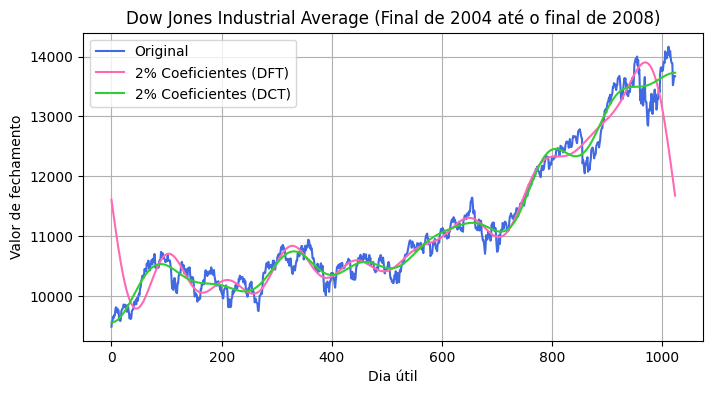

In [130]:
data = load_data('/content/Tarefa2-MCF/dow2.txt')
plot_data(data, 'Final de 2004 at√© o final de 2008')

# Plotar os dados reconstru√≠dos com 2% dos coeficientes
reconstructed_data_dft = filter_fft_and_reconstruct(data, 2)
plt.plot(reconstructed_data_dft, label='2% Coeficientes (DFT)', color='hotpink')

# Plotar os dados reconstru√≠dos com 2% dos coeficientes
reconstructed_data_dct = filter_dct_and_reconstruct(data, 2)
plt.plot(reconstructed_data_dct, label='2% Coeficientes (DCT)', color='limegreen')

plt.legend()
plt.show()

## Discuss√£o de resultados

# *¬∞:‚ãÜ‚Çì‚Çí Compress√£o de imagem

Nesta se√ß√£o, realiza-se a compress√£o de imagem utilizando a Transformada Cosseno Discreta (DCT). Este √©, vagamente, o m√©todo de compress√£o utilizado pelo formato JPEG, utilizado para reduzir o tamanho de arquivos de imagens digitais sem comprometer significativamente a qualidade visual.

## Utilit√°rios

### Extra√ß√£o de dados
Para extrair e visualizar uma imagem a partir de um arquivo de dados, carregamos os inteiros contidos no arquivo, que representam os valores de intensidade dos pixels da imagem. Esses n√∫meros s√£o organizados em uma matriz bidimensional, onde cada elemento da matriz corresponde a um pixel da imagem.

In [131]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    return np.loadtxt(filename, dtype=int)

def plot_original(data_array):
    plt.imshow(data_array, cmap='gray')
    plt.colorbar()
    plt.title('original image')
    plt.show()

### Transforma√ß√£o Discreta de Cosseno 2D
Usaremos o seguinte bloco de c√≥digo que implementa a fun√ß√£o DCT e sua inversa, a qual foi explica na se√ß√£o 2 "Filtragem e suaviza√ß√£o de Fourier". Ainda, no caso da aplica√ß√£o em imagens, realizamos a two-dimensional Type-II DCT, que form the mathematical basis for the computer image file JPEG.

A DCT bidimensional, por outro lado, √© aplicada a uma matriz bidimensional, ou seja, a uma imagem ou um bloco de dados com duas dimens√µes. A principal diferen√ßa entre a DCT 1D e a DCT 2D √© que a DCT 2D aplica a transforma√ß√£o em ambas as dimens√µes do dado.

Para aplicar a DCT 2D, realiza-se a DCT 1D em cada linha da matriz, seguida da DCT 1D em cada coluna da matriz resultante. Essa aplica√ß√£o sequencial em duas dimens√µes transforma a matriz original em uma nova matriz, onde as componentes de frequ√™ncia est√£o mais concentradas, facilitando opera√ß√µes como compress√£o. Similarmente, a inversa aplica-se em duas dimens√µes para transformar os dados do dom√≠nio da frequ√™ncia de volta ao dom√≠nio espacial ou do tempo.


The JPEG format works by dividing the pixels in an image into blocks, performing OCTs on the blocks (two-dimensional Type-II OCTs to be exact), then looking for coefficients ak that are small and can be discarded.4 The remaining coefficients are stored in a file and, when you view a picture or request the relevant web page, your computer reconstitutes the picture using the inverse transform of Eq. (7.35)

The advantage of storing images this way is that in many cases most of the ak are very small and can be neglected. Because only the small remaining fraction of the Fourier
coefficients need to be stored, the size of the file required to store the whole picture is thus greatly reduced, and if the picture is transmitted over the Internet, for instance as part of a web page, we save on the time needed to transmit it. The disadvantage is that, because some of the Fourier data are thrown away, the picture you get back on your screen isn't quite the same picture you started with.


In [132]:
#   dct(y): Type-II discrete cosine transform (DCT) of real data y
#   idct(a): Type-II inverse DCT of a
#   dct2(y): 2D DCT of 2D real array y
#   idct2(a): 2D inverse DCT real array a

# Written by Mark Newman <mejn@umich.edu>, June 24, 2011
# You may use, share, or modify this file freely

from numpy import empty,arange,exp,real,imag,pi
from numpy.fft import rfft,irfft

# 1D DCT Type-II
def dct(y):
    N = len(y)
    y2 = empty(2*N,float)
    y2[:N] = y[:]
    y2[N:] = y[::-1]

    c = rfft(y2)
    phi = exp(-1j*pi*arange(N)/(2*N))
    return real(phi*c[:N])

# 2D DCT
def dct2(y):
    M = y.shape[0]
    N = y.shape[1]
    a = empty([M,N],float)
    b = empty([M,N],float)

    for i in range(M):
        a[i,:] = dct(y[i,:])
    for j in range(N):
        b[:,j] = dct(a[:,j])

    return b

# 1D inverse DCT Type-II
def idct(a):
    N = len(a)
    c = empty(N+1,complex)

    phi = exp(1j*pi*arange(N)/(2*N))
    c[:N] = phi*a
    c[N] = 0.0
    return irfft(c)[:N]

# 2D inverse DCT
def idct2(b):
    M = b.shape[0]
    N = b.shape[1]
    a = empty([M,N],float)
    y = empty([M,N],float)

    for i in range(M):
        a[i,:] = idct(b[i,:])
    for j in range(N):
        y[:,j] = idct(a[:,j])

    return y

## Compress√£o da imagem

### Coeficientes de Fourier

A seguinte fun√ß√£o realiza DCT em duas dimens√µes. Ela itera sobre uma matriz de imagens em blocos de 16 x 16 pixels, aplicando a transforma√ß√£o para gerar uma matriz 16x16 de coeficientes de Fourier reais para cada bloco.

In [133]:
def process_dct(data_array):
  height, width = data_array.shape
  coef_array = np.zeros_like(data_array)

  block_tam = 16
  for i in range(0, height, block_tam):
      for j in range(0, width, block_tam):
          block = data_array[i:i+block_tam, j:j+block_tam]
          dct2_block = dct2(block)
          coef_array[i:i+block_tam, j:j+block_tam] = dct2_block

  return coef_array

### Threshold dos coeficientes de Fourier

Agora, com a matriz dos coeficientes de Fourier, define-se como zero os coeficientes cujo valor absoluto √© menor que o limiar, realizando assim a compress√£o por limiariza√ß√£o. Isso significa que coeficientes de alta frequ√™ncia (menos importantes para a representa√ß√£o visual) s√£o removidos ou reduzidos a zero, o que pode reduzir significativamente o tamanho do arquivo de imagem comprimido.

Para calcular a taxa de compress√£o entre a imagem original e a imagem comprimida, √© ent√£o calculada a raz√£o entre o tamanho total da imagem original e o n√∫mero de pixels n√£o nulos na imagem comprimida. Isso fornece uma medida de quanto a imagem foi comprimida em rela√ß√£o ao tamanho original, sendo que uma rela√ß√£o maior indica uma maior compress√£o,


In [134]:
def process_dct_thresh(coef_array, threshold):
  coef_array[np.abs(coef_array) < threshold] = 0
  return coef_array

def calc_compression(original_img, compressed_img):
    total_orig = original_img.size
    nonzero_comp = original_img.size - np.count_nonzero(compressed_img == 0)
    compression_ratio = total_orig / nonzero_comp
    return compression_ratio

### Recupera√ß√£o da imagem

Para recuperar a imagem original, √© aplicado o processo inverso √† transforma√ß√£o que comprimiu os dados. Isso permite restaurar os detalhes visuais presentes em cada bloco de 16x16 pixels, o que permite restaurar os detalhes visuais da imagem original.

In [135]:
def inverse_dct_to_image(thresh_data):
    height, width = thresh_data.shape
    reconstruct_array = np.zeros_like(data_array)

    block_tam = 16
    for i in range(0, height, block_tam):
        for j in range(0, width, block_tam):
            block = thresh_data[i:i+block_tam, j:j+block_tam]
            block_idct = idct2(block)
            reconstruct_array[i:i+block_tam, j:j+block_tam] = block_idct

    return reconstruct_array

### Gr√°fico de densidade da imagem

 Para visualizar a densidade da imagem, um histograma que mostra a distribui√ß√£o das intensidades de pixel na imagem reconstru√≠da. Cada barra no histograma representa a frequ√™ncia ou a densidade de pixels que possuem uma determinada intensidade, permitindo uma visualiza√ß√£o r√°pida e quantitativa das caracter√≠sticas de intensidade da imagem ap√≥s o processo de reconstru√ß√£o.

In [136]:
def plot_density(original_image, reconstructed_image):
    # Plotar gr√°fico de densidade e imagem reconstru√≠da
    plt.figure(figsize=(6, 2))
    plt.hist(reconstructed_image.flatten(), bins=50, density=True, alpha=0.4, color='deeppink', label='Reconstructed Image')
    plt.hist(original_image.flatten(), bins=50, density=True, alpha=0.4, color='mediumseagreen', label='Original Image')
    plt.title('density')
    plt.xlabel('Pixel Value')
    plt.ylabel('Density')
    plt.legend()

    plt.show()

## Plotagens



In [137]:
def plot_dct_image(coef_image, subplot_num):
    plt.subplot(subplot_num)
    im = plt.imshow(coef_image, cmap='gray', interpolation='nearest')
    plt.title('Fourier coefficients using DCT2')
    plt.colorbar(im, shrink=0.8)

def plot_thresholded_image(thresh_image, subplot_num):
    plt.subplot(subplot_num)
    im = plt.imshow(thresh_image, cmap='gray', interpolation='nearest')
    plt.title('Thresholded dct coefficients')
    plt.colorbar(im, shrink=0.8)

def plot_comparison(original_image, reconstructed_image):
  plt.figure(figsize=(10, 6))

  plt.subplot(1, 2, 1)
  plt.imshow(data_array, cmap='gray')
  plt.title('original image')

  plt.subplot(1, 2, 2)
  plt.imshow(reconstructed_image, cmap='gray')
  plt.title('reconstructed image')
  plt.show()

## Aplica√ß√£o

**üè†Caso base com threshold = 10**

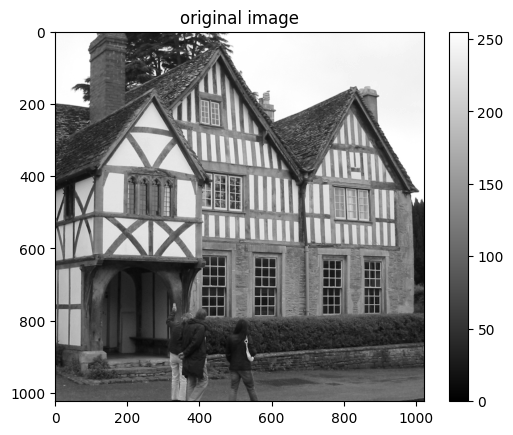

In [138]:
threshold = 10

filename = '/content/Tarefa2-MCF/house.txt'
data_array = load_data(filename)

plt.imshow(data_array, cmap='gray')
plt.colorbar()
plt.title('original image')
plt.show()

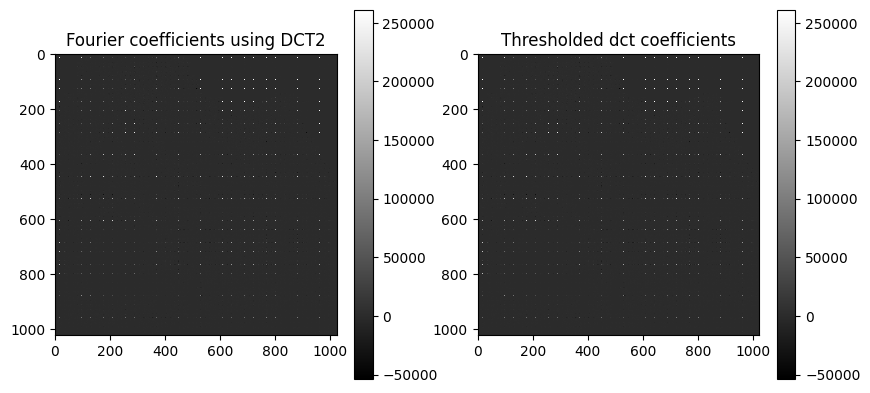

In [139]:
coef_image = process_dct(data_array)
thresh_image = process_dct_thresh(coef_image, threshold)

plt.figure(figsize=(10, 6))

plot_dct_image(coef_image, 121)
plot_thresholded_image(thresh_image, 122)

plt.show()

1.3634018473828742


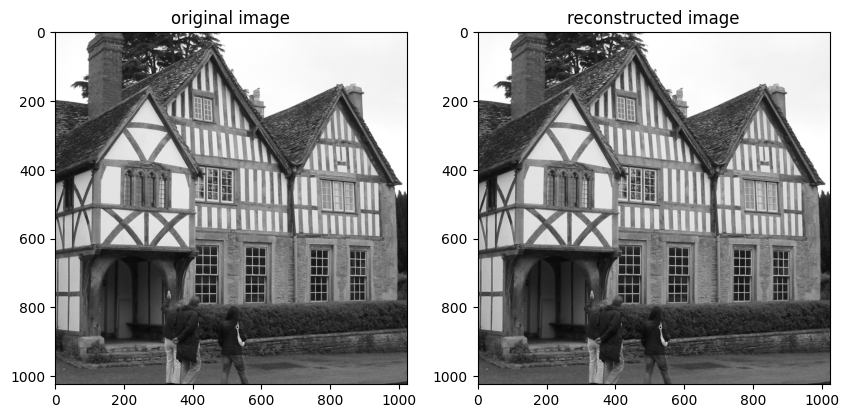

In [140]:
thresh_image = process_dct_thresh(coef_image, threshold)
compression_ratio = calc_compression(data_array, thresh_image)
reconstructed_image = inverse_dct_to_image(thresh_image)

print(compression_ratio)
plot_comparison(data_array, reconstructed_image)

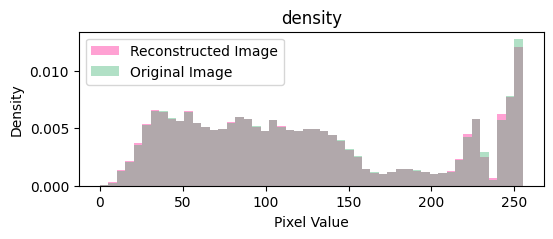

In [141]:
plot_density(data_array, reconstructed_image)

**üè†Caso 1: Threshold = 100**

2.980441647551724


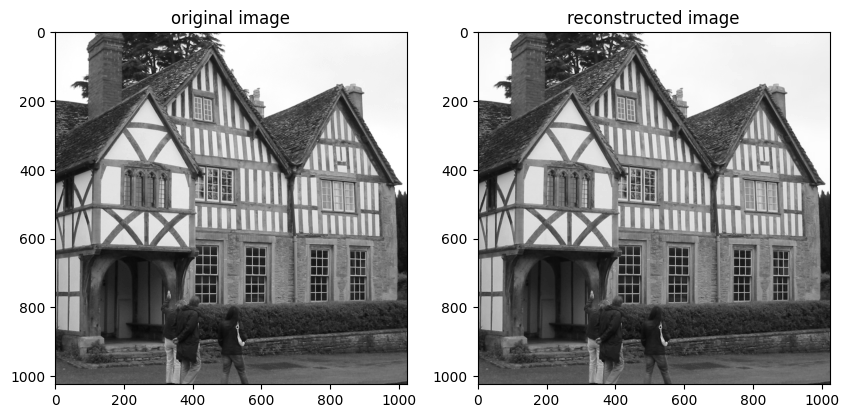

In [142]:
threshold = 100

filename = '/content/Tarefa2-MCF/house.txt'
data_array = load_data(filename)
coef_image = process_dct(data_array)
thresh_image = process_dct_thresh(coef_image, threshold)
compression_ratio = calc_compression(data_array, thresh_image)
reconstructed_image = inverse_dct_to_image(thresh_image)

print(compression_ratio)
plot_comparison(data_array, reconstructed_image)


**üè†Caso 2: Threshold = 250**

5.582550271254479


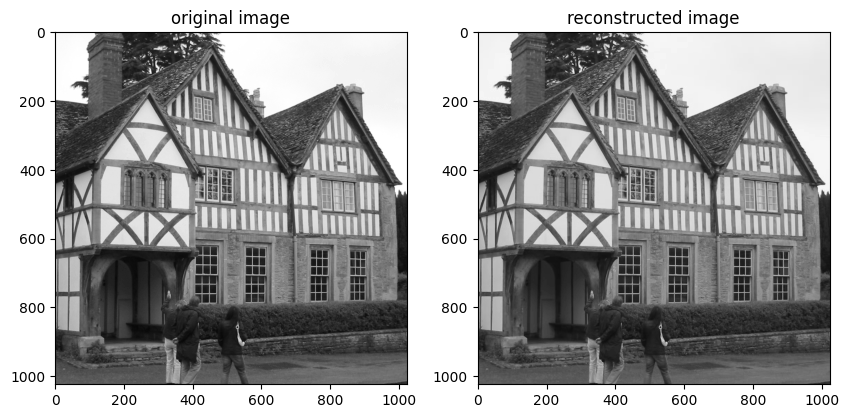

In [143]:
threshold = 250

filename = '/content/Tarefa2-MCF/house.txt'
data_array = load_data(filename)
coef_image = process_dct(data_array)
thresh_image = process_dct_thresh(coef_image, threshold)
compression_ratio = calc_compression(data_array, thresh_image)
reconstructed_image = inverse_dct_to_image(thresh_image)

print(compression_ratio)
plot_comparison(data_array, reconstructed_image)


**üè†Caso 3: Threshold = 500**

9.918895142600388


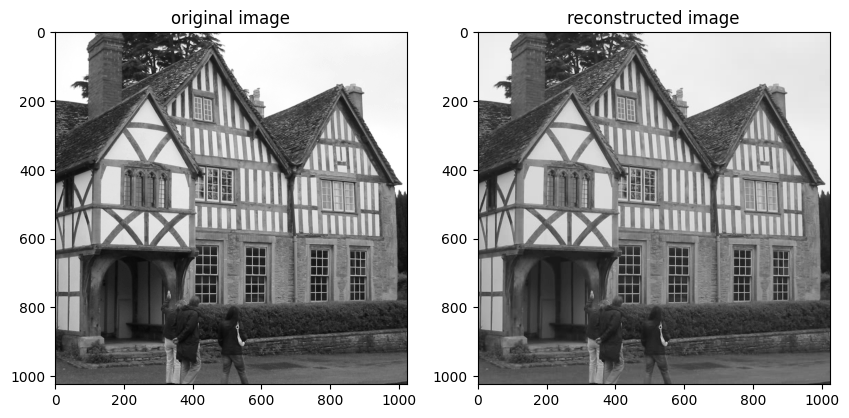

In [144]:
threshold = 500

filename = '/content/Tarefa2-MCF/house.txt'
data_array = load_data(filename)
coef_image = process_dct(data_array)
thresh_image = process_dct_thresh(coef_image, threshold)
compression_ratio = calc_compression(data_array, thresh_image)
reconstructed_image = inverse_dct_to_image(thresh_image)

print(compression_ratio)
plot_comparison(data_array, reconstructed_image)


**üè†Caso 4: Threshold = 1000**

18.256424542099033


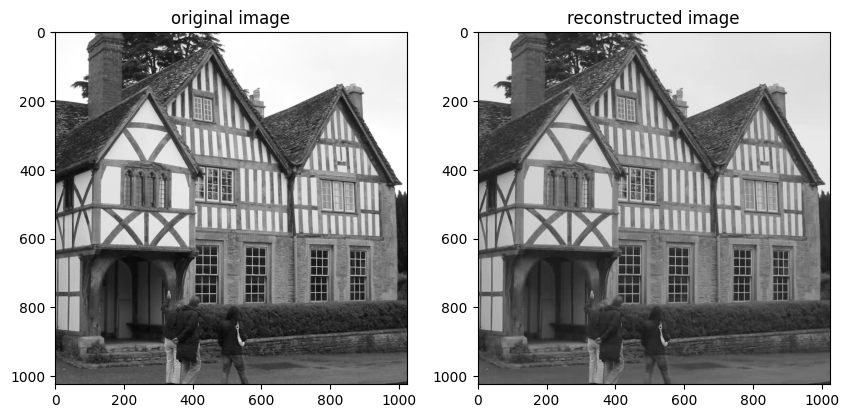

In [145]:
threshold = 1000

filename = '/content/Tarefa2-MCF/house.txt'
data_array = load_data(filename)
coef_image = process_dct(data_array)
thresh_image = process_dct_thresh(coef_image, threshold)
compression_ratio = calc_compression(data_array, thresh_image)
reconstructed_image = inverse_dct_to_image(thresh_image)

print(compression_ratio)
plot_comparison(data_array, reconstructed_image)

**üè†Caso 5: Threshold = 5000**

80.87743925954493


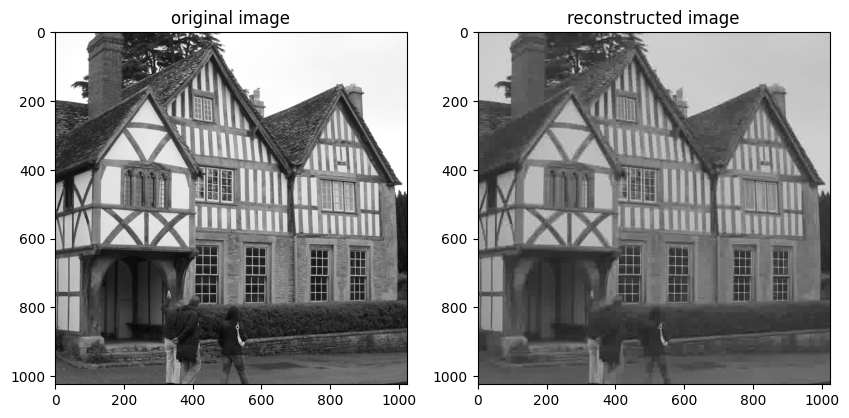

In [146]:
threshold = 5000

filename = '/content/Tarefa2-MCF/house.txt'
data_array = load_data(filename)
coef_image = process_dct(data_array)
thresh_image = process_dct_thresh(coef_image, threshold)
compression_ratio = calc_compression(data_array, thresh_image)
reconstructed_image = inverse_dct_to_image(thresh_image)

print(compression_ratio)
plot_comparison(data_array, reconstructed_image)

**üè†Caso 5: Threshold = 25000**

234.58076062639822


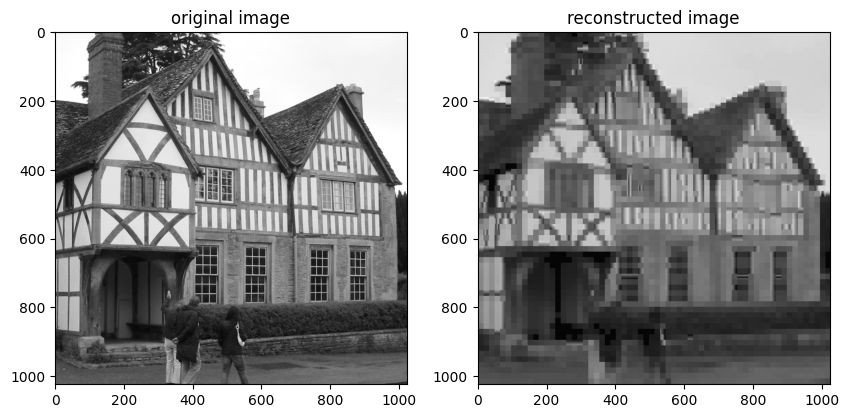

In [147]:
threshold = 25000

filename = '/content/Tarefa2-MCF/house.txt'
data_array = load_data(filename)
coef_image = process_dct(data_array)
thresh_image = process_dct_thresh(coef_image, threshold)
compression_ratio = calc_compression(data_array, thresh_image)
reconstructed_image = inverse_dct_to_image(thresh_image)

print(compression_ratio)
plot_comparison(data_array, reconstructed_image)

## Discuss√£o de resultados

A partir dos testes realizados com diferentes n√≠veis de compress√£o de imagem, foi poss√≠vel observar como a taxa de compress√£o afeta significativamente a qualidade visual das imagens. Inicialmente, com um threshold de at√© 1000, as imagens mantinham sua forma e caracter√≠sticas principais, sendo praticamente indistingu√≠veis da imagem original. A √∫nica diferen√ßa not√°vel era uma leve diminui√ß√£o na luminosidade, mas os detalhes principais permaneciam intactos. No entanto, ao aumentar o threshold para 5000, notou-se uma deteriora√ß√£o mais evidente na qualidade visual. As cores se tornaram mais acinzentadas e os detalhes finos, como os casacos das pessoas em fotos, come√ßaram a perder defini√ß√£o, resultando em uma imagem que n√£o era t√£o parecida com a original. Com um threshold muito mais alto, de 25000, a qualidade da imagem caiu drasticamente, com as formas das pessoas com detalhes totalmente perdidos e uma resolu√ß√£o muit√≠ssimo baixa.

# Refer√™ncias

* https://web.mit.edu/~gari/teaching/6.555/lectures/ch_DFT.pdf
* https://www.robots.ox.ac.uk/~sjrob/Teaching/SP/l7.pdf
* https://howthefouriertransformworks.com/
* https://www.mindspore.cn/news/newschildren/en?id=2992&type=technologyBlog
* Newman, M. E. J. (2013). Computational physics (2nd ed.). CreateSpace Independent Publishing Platform.